In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train =  x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  =   x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test  = x_test  / 255.0

print('Number of images in x_train    : ', x_train.shape[0])
print('Number of images in x_test     : ', x_test.shape[0])


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(x = x_train,y = y_train, epochs=5)

#model = load_model('Models/CNN.h5')        # To load the model

Number of images in x_train    :  60000
Number of images in x_test     :  10000


In [3]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 447us/step


[0.05394735940323444, 0.9849]

Predicted number is:  8


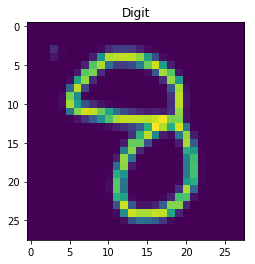

In [7]:
im     =  cv.imread("Test/eight.png",0)
im     =  cv.resize(im,(28,28))

im = im/255.0
im = 1.0 - im
im = np.reshape(im,(1,28,28,1))

x = model.predict(im)

print('Predicted number is: ',np.argmax(x[0]))

im = np.reshape(im,(im.shape[1],im.shape[2]))

plt.imshow(im)
plt.title('Digit')
plt.show()